<a href="https://colab.research.google.com/github/rohankalbag/EE325-Assignment-Repo/blob/main/Assignment%203/Q1_partb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from tabulate import tabulate

In [2]:
random.seed(42)

In [3]:
# Format matplotlib for good looking plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

In [4]:
def rand_coin(p):
  return 1*(random.random()<p)

In [5]:
def max_ind(UCB):
  UCB_max = max(UCB)
  count = sum([ucb == UCB_max for ucb in UCB])
  if(count == 1):
    return UCB.index(UCB_max)
  elif(count == 2):
    t = rand_coin(0.5)
    return t*(UCB.index(UCB_max))+(1-t)*(2-(UCB[::-1].index(UCB_max)))
  else:
    return random.randint(0,2)

In [6]:
def algoB(N,P,alpha):
  n = [0,0,0]
  k = [0,0,0]
  X = [0,0,0]
  UCB = [float('inf'),float('inf'),float('inf')]
  for i in range(1,N+1):
    ind = max_ind(UCB)
    k[ind] +=1
    n[ind] += rand_coin(P[ind])
    UCB[ind] = n[ind]/k[ind] + (-math.log(alpha)/(2*k[ind]))**0.5
  R = sum(n)
  return  R, k[P.index(max(P))]

In [7]:
algoB(1000,[0.2,0.4,0.7],0.01)

(679, 956)

In [8]:
P_all = [[0.2,0.4,0.7],[0.45,0.5,0.58]]

N = [20,100,1000,5000]
alphas = [0.1,0.05,0.01]

In [9]:
table = []
num_steps = len(P_all)*len(N)*len(alphas)*1000
progress_bar = tqdm(range(num_steps))
for P in P_all:
  for N0 in N:
    for alpha in alphas:
      num_heads = []
      num_corr = []
      for i in range(1000):
        r, c = algoB(N0,P,alpha)
        num_heads.append(r)
        num_corr.append(c)
        progress_bar.update(1)
      heads_avg = sum(num_heads)/len(num_heads)
      count_avg = sum(num_corr)/len(num_corr)
      table.append([P,N0,alpha,heads_avg,count_avg])

  0%|          | 0/24000 [00:00<?, ?it/s]

In [10]:
print(tabulate(table, headers = ['Probabilites','N','alpha','Average # Heads','# times correct coin is used']))

Probabilites          N    alpha    Average # Heads    # times correct coin is used
-----------------  ----  -------  -----------------  ------------------------------
[0.2, 0.4, 0.7]      20     0.1              11.223                          12.703
[0.2, 0.4, 0.7]      20     0.05             11.102                          12.394
[0.2, 0.4, 0.7]      20     0.01             10.834                          11.715
[0.2, 0.4, 0.7]     100     0.1              65.315                          86.918
[0.2, 0.4, 0.7]     100     0.05             64.674                          84.793
[0.2, 0.4, 0.7]     100     0.01             63.531                          82.219
[0.2, 0.4, 0.7]    1000     0.1             693.54                          980.389
[0.2, 0.4, 0.7]    1000     0.05            693.502                         980.395
[0.2, 0.4, 0.7]    1000     0.01            689.904                         972.615
[0.2, 0.4, 0.7]    5000     0.1            3492.61                         4

In [11]:
plot_this = [{},{}]
for j,P in enumerate(P_all):
  for alpha in alphas:
    kbyi = np.zeros((5000,3))
    for i in range(1000):
        n = [0,0,0]
        k = [0,0,0]
        X = [0,0,0]
        UCB = [float('inf'),float('inf'),float('inf')]
        for a0 in range(1,5000+1):
          ind = max_ind(UCB)
          k[ind] +=1
          n[ind] += rand_coin(P[ind])
          UCB[ind] = n[ind]/k[ind] + (-math.log(alpha)/(2*k[ind]))**0.
          kbyi[a0-1] += np.array(k)/a0
    plot_this[j][alpha] = kbyi/1000

In [12]:
def plot(p_ind,alpha):
  colors = ['r','g','b','c','y','k',]
  for i in range(0,1000):
    plt.scatter([i,i,i],plot_this[p_ind][alpha][i],color = colors[random.randint(0,len(colors)-1)])
  plt.yticks(np.arange(0,1,0.1))
  plt.xticks(np.arange(0,1001,100))
  plt.title('Plot of sample average of (# coin is used in first i tosses)/i  with i for N = {} and alpha = {}'.format(5000,alpha))
  plt.xlabel('# coin tosses i')
  plt.ylabel('(# coin is used in first i tosses)/i tosses')
  plt.text(500,plot_this[p_ind][alpha][500][0]+0.02*(1-3*p_ind),'coin A with p = {}'.format(P_all[p_ind][0]))
  plt.text(500,plot_this[p_ind][alpha][500][1]+0.02,'coin B with p = {}'.format(P_all[p_ind][1]))
  plt.text(500,plot_this[p_ind][alpha][500][2]+0.02,'coin C with p = {}'.format(P_all[p_ind][2]))
  pass 

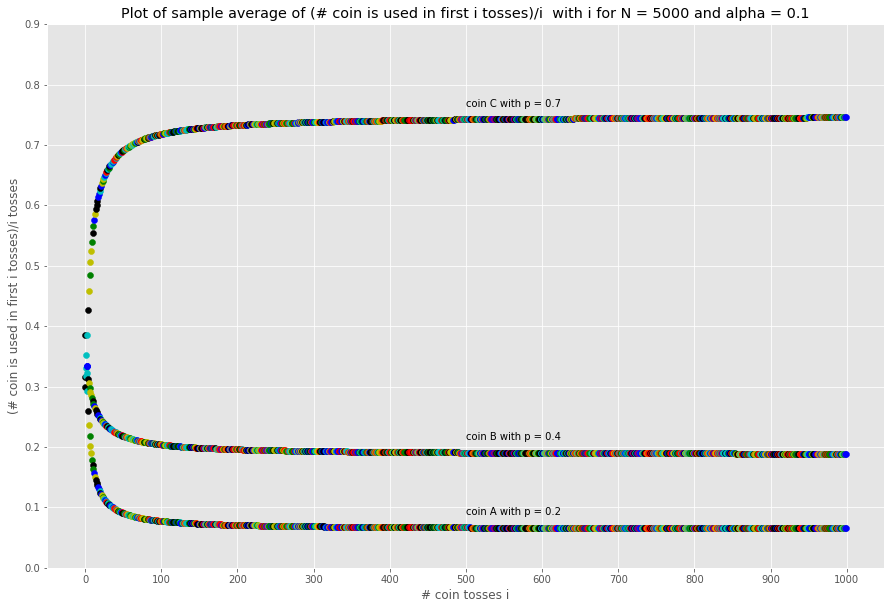

In [13]:
plot(0,0.1)

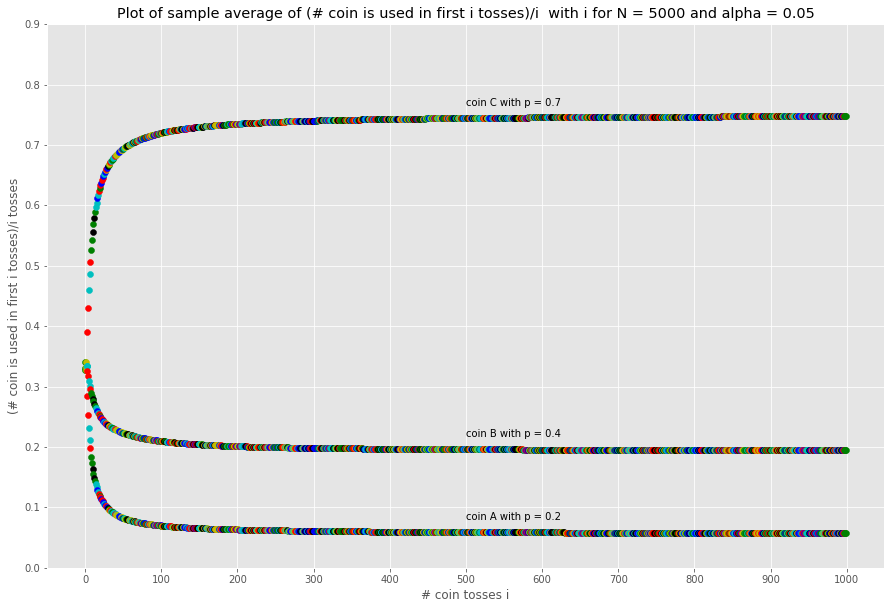

In [14]:
plot(0,0.05)

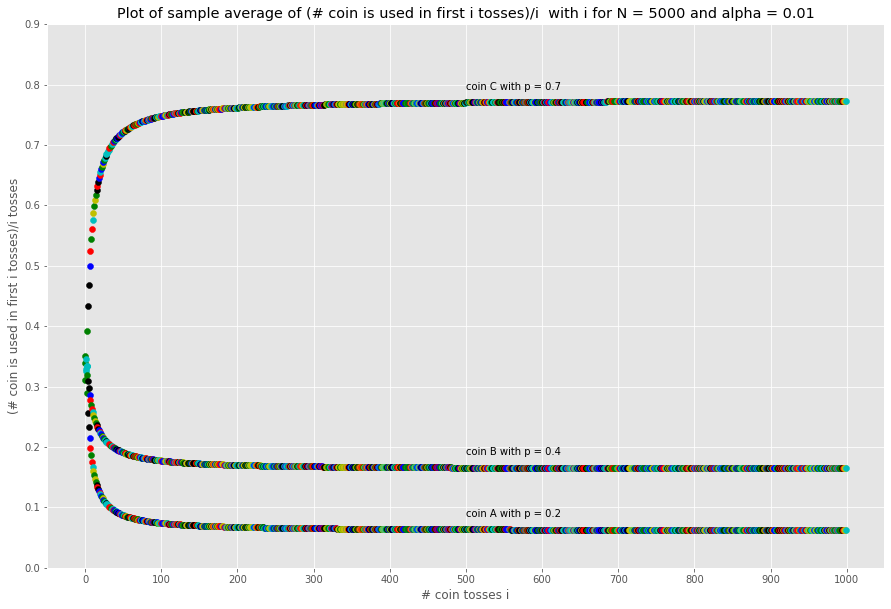

In [15]:
plot(0,0.01)

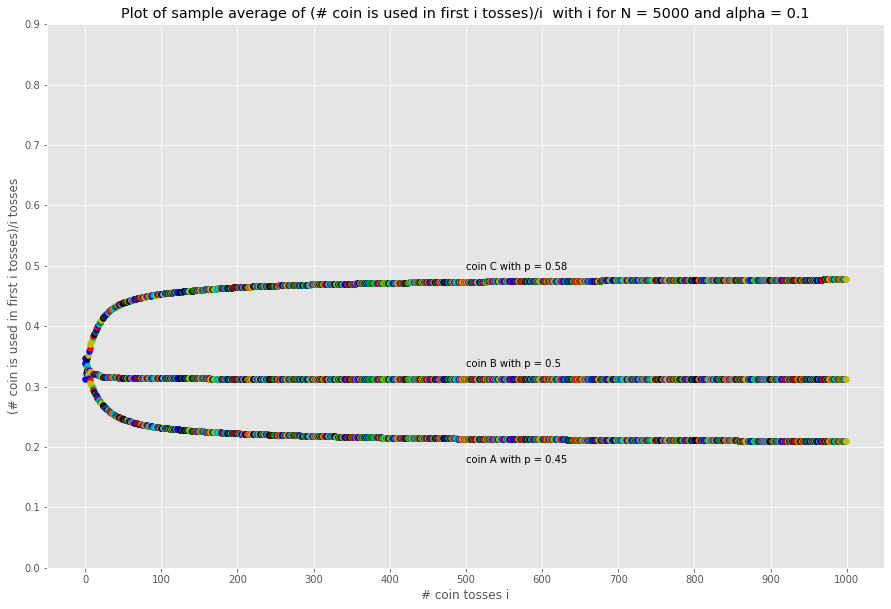

In [16]:
plot(1,0.1)

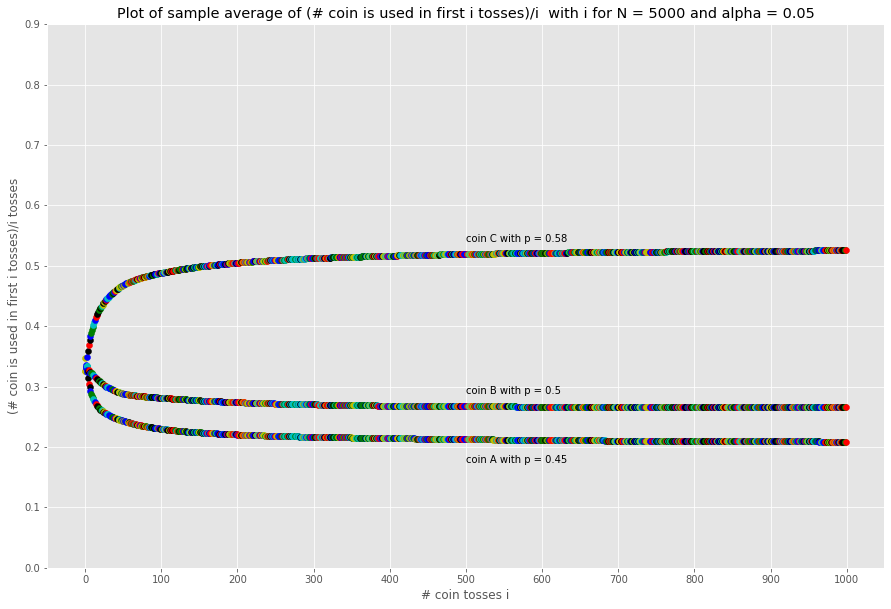

In [17]:
plot(1,0.05)

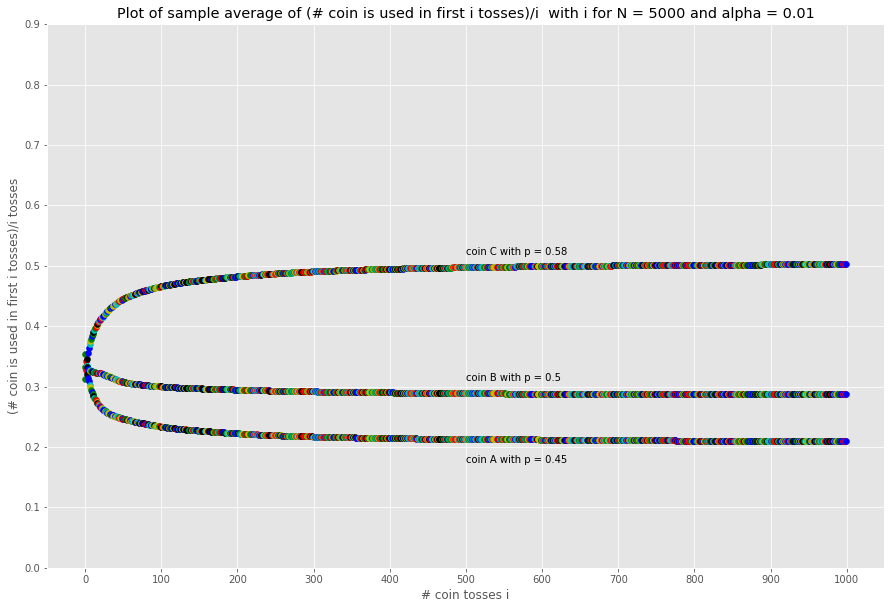

In [18]:
plot(1,0.01)